In [1]:
%matplotlib inline

## ANOVA

ANOVA, или дисперсионный анализ - методы, которые применяются для установления влияния категориальных переменных (или группировочных признаков) на непрерывную эндогенную переменную.

### One-way ANOVA

Используется в случае, если у нас есть одна зависимая переменная и мы хотим изучить влияние категориальных предикторов (или факторов) на ее величину.

Предположения, лежащие в основе теста:
- Нормальное распределение остатков эндогенной переменной;
- Равенство дисперсий в исследуемых совокупностях;
- Наблюдения на эндогенной переменной в группе - iid.

Нулевая гипотеза:
$$H_0: \mu_1 = \mu_2 = \mu_3. $$


Тест, по сути, сводится к сравнению доли дисперсии, объясненной группировкой, к общей изменчивости признака:
$$ F = \frac{Var_{between}}{Var_{within}}.$$

Традциионная форма представления - таблица ANOVA, из которой понятна суть расчета:

|Источник      |SS                                      |df   |MS                 |F                  |p|
|--------------|----------------------------------------|-----|-------------------|-------------------|-|
|Между группами|$\sum_{k}n_k(\bar{X}_k-\bar{X}_{.})^2$  |$k-1$|$\frac{SS_b}{df_b}$|$\frac{MS_b}{MS_w}$|$F_{cr}$|
|Внутри групп  |$\sum_{k}\sum_{i}(x_{ik}-\bar{X}_k)^2$  |$n-k$|$\frac{SS_w}{df_w}$|                   | |
|Общая         |$\sum_{k}\sum_{i}(x_{ik}-\bar{X}_{.})^2$|$n-1$|                   |                   | |

где:
- $k$ - число групп;
- $n$ - объем выборки;
- $\bar{X}_k$ - среднее внутри группы;
- $\bar{X}_.$ - среднее без группировки.

Наблюдаемое значение сравнивается с значениями $F-распределения$ с $df_1$ и $df_2$.

In [6]:
import pandas as pd
from scipy import stats
data = pd.read_csv('data/PlantGrowth.csv')

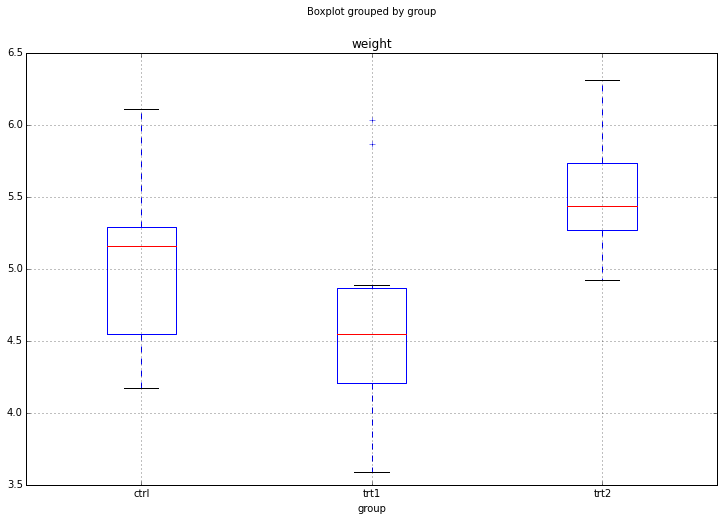

In [4]:
data.boxplot('weight', by='group', figsize=(12, 8))

In [5]:
ctrl = data['weight'][data.group == 'ctrl']
grps = pd.unique(data.group.values)
d_data = {grp:data['weight'][data.group == grp] \
    for grp in pd.unique(data.group.values)}

In [7]:
F, p = stats.f_oneway(d_data['ctrl'], d_data['trt1'], d_data['trt2'])

In [8]:
F

4.8460878623800658

In [9]:
p

0.015909958325623707

In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('weight ~ group',
                data=data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print aov_table

            sum_sq  df         F   PR(>F)
group      3.76634   2  4.846088  0.01591
Residual  10.49209  27       NaN      NaN


После проведения ANOVA часто используется тест Турки (Turkey's range test).

In [12]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

Тест Турки - один из способов уже знакомой нам множественной проверки гипотез, при которой значимость между каждой парой средних проверяется на значимость:
$$ \mu_i - \mu_j = 0.$$

Говоря неформально, это t-тест для средних, использующий не уровень значимости, а FWER (то есть корректировку на то, что у нас гипотеза не одна, а множество).

http://webspace.ship.edu/pgmarr/Geo441/Readings/Tukey%201949%20-%20Comparing%20Individual%20Means%20in%20the%20Analysis%20of%20Variance.pdf

In [14]:
mc = MultiComparison(data['weight'], data['group'])
result = mc.tukeyhsd()
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 ctrl   trt1   -0.371  -1.0621 0.3201 False 
 ctrl   trt2   0.494   -0.1971 1.1851 False 
 trt1   trt2   0.865    0.1739 1.5561  True 
--------------------------------------------
['ctrl' 'trt1' 'trt2']


Варианты теста:
* ANOVA для повторяющихся наблюдений;
* Two-way ANOVA.